# Random Forest. Model A.

In [ ]:
#Abrir csv del conjunto de datos limpio
import pandas as pd
df_copy_2_interpolado_copy_sin_outliers = pd.read_csv('dataset_limpio.csv', sep=",")
df_copy_2_interpolado_copy_sin_outliers

,Año,Mes,Día,Hora,Minuto,A_Optimal - Power DC [W],Ambient Temperature [ºC],Global Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
0,2014,1,1,7,41,2.850946,9.700000,7.131149,0.751824,0.700000,275.333840
1,2014,1,1,7,42,1.674750,9.700000,7.040442,0.781930,0.666667,278.503060
2,2014,1,1,7,43,1.732500,9.700000,6.594407,0.813929,0.616667,284.667120
3,2014,1,1,7,44,1.790250,9.700000,7.358729,0.849919,0.666667,278.666660
4,2014,1,1,7,45,1.831500,9.700000,7.470711,0.886891,0.633333,272.666360
...,...,...,...,...,...,...,...,...,...,...,...
616369,2016,12,29,17,27,0.855000,15.200000,6.546354,0.836866,0.683333,90.670424
616370,2016,12,29,17,28,0.855000,15.200000,6.481665,0.801994,0.833333,87.849608
616371,2016,12,29,17,29,0.855000,15.200000,4.924317,0.766211,0.883333,84.505200
616372,2016,12,29,17,30,0.855000,15.133332,5.480427,0.740643,0.783333,72.378000


In [2]:
df_copy_2_interpolado_copy_sin_outliers.isna().sum()

Año                         0
Mes                         0
Día                         0
Hora                        0
Minuto                      0
A_Optimal - Power DC [W]    0
Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
dtype: int64

## 1. Particionado datos ML

In [3]:
#PARTICIONADO DEL CONJUNTO DE DATOS: DF
# Construcción de una función que realice el particionado completo

from sklearn.model_selection import train_test_split

def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

df = df_copy_2_interpolado_copy_sin_outliers
# División del conjunto de datos 
train_set, val_set, test_set = train_val_test_split(df)

print("Longitud del conjunto de datos:", len(df))
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del conjunto de datos: 616374
Longitud del Training Set: 369824
Longitud del Validation Set: 123275
Longitud del Test Set: 123275


In [4]:
def preparar_datos(df, prototipo):
    """
    Función para preparar datos de entrenamiento, validación y prueba
    para diferentes prototipos.
    
    Parámetros:
    df (DataFrame): El conjunto de datos de entrada.
    prototipo (str): El prototipo ('A' o 'B').
        
    Retorna:
    tuple: DataFrames X_train, y_train, X_val, y_val, X_test, y_test.
    """
    columna_objetivo = f"{prototipo}_Optimal - Power DC [W]"
    
    X_train = train_set.drop(columna_objetivo, axis=1)
    y_train = train_set[columna_objetivo].copy()
    
    X_val = val_set.drop(columna_objetivo, axis=1)
    y_val = val_set[columna_objetivo].copy()
    
    X_test = test_set.drop(columna_objetivo, axis=1)
    y_test = test_set[columna_objetivo].copy()
    
    return X_train, y_train, X_val, y_val, X_test, y_test

prototipo_seleccionado = 'A'
# Preparar los datos basados en la selección del usuario
X_train, y_train, X_val, y_val, X_test, y_test = preparar_datos(df, prototipo_seleccionado)

X_train = X_train.sort_index()
y_train = y_train.sort_index()
X_val = X_val.sort_index()
y_val = y_val.sort_index()
X_test = X_test.sort_index()
y_test= y_test.sort_index()

Text(0.5, 1.0, 'Pruebas - A_Optimal - Power DC [W]')

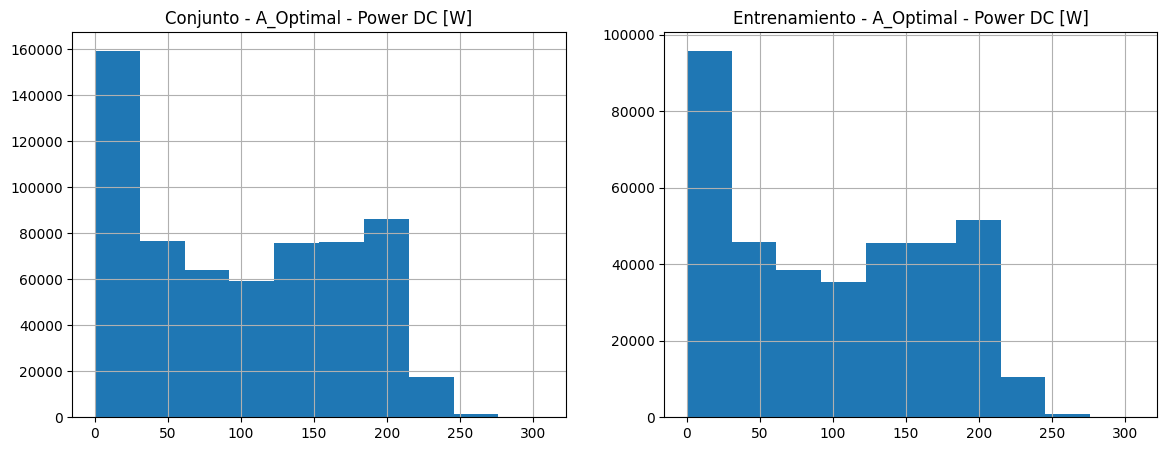

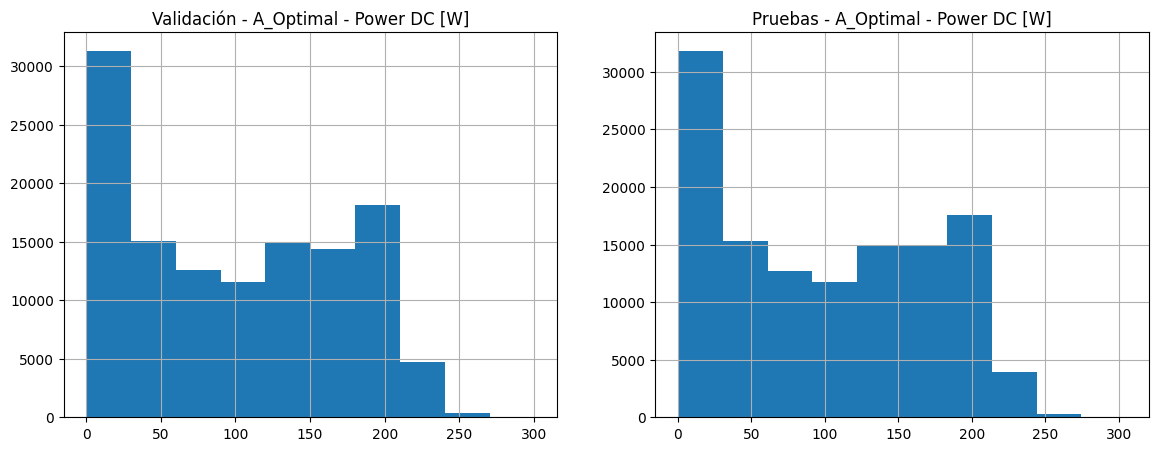

In [5]:
import matplotlib.pyplot as plt
# Comprobación de que stratify mantiene la proporcion de la característica en los conjuntos
plt.figure(figsize=(14, 5))

plt.subplot(121)
df["A_Optimal - Power DC [W]"].hist()
plt.title('Conjunto - A_Optimal - Power DC [W]')

plt.subplot(122)
train_set["A_Optimal - Power DC [W]"].hist()
plt.title('Entrenamiento - A_Optimal - Power DC [W]')


plt.figure(figsize=(14, 5))
plt.subplot(121)
val_set["A_Optimal - Power DC [W]"].hist()
plt.title('Validación - A_Optimal - Power DC [W]')

plt.subplot(122)
test_set["A_Optimal - Power DC [W]"].hist()
plt.title('Pruebas - A_Optimal - Power DC [W]')

#se mantiene la proporción.

# 2. Copia de conjunto particionado

In [6]:
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
X_test_copy = X_test.copy()

y_train_copy = y_train.copy()
y_val_copy = y_val.copy()
y_test_copy = y_test.copy()

# 3. Escalado de los datos
Se escalarán los datos y se comprobará si escalando se obtienen mejores resultados.

In [7]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_copy)
y_train_scaled = scaler.fit_transform(y_train_copy.values.reshape(-1, 1))
X_val_scaled = scaler.fit_transform(X_val_copy)
y_val_scaled = scaler.fit_transform(y_val_copy.values.reshape(-1, 1))
X_test_scaled = scaler.fit_transform(X_test_copy)
y_test_scaled = scaler.fit_transform(y_test_copy.values.reshape(-1, 1))

# Transformación a un DataFrame de Pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_copy.columns, index=X_train_copy.index)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=['A_Optimal - Power DC [W]'], index=y_train_copy.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_copy.columns, index=X_val_copy.index)
y_val_scaled = pd.DataFrame(y_val_scaled, columns=['A_Optimal - Power DC [W]'], index=y_val_copy.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_copy.columns, index=X_test_copy.index)
y_test_scaled = pd.DataFrame(y_test_scaled, columns=['A_Optimal - Power DC [W]'], index=y_test_copy.index)


#DATOS ESCALADOS
# Copiamos el conjunto de datos para no alterar el original
X_train_scaled_copy = X_train_scaled.copy()
y_train_scaled_copy = y_train_scaled.copy()
X_val_scaled_copy = X_val_scaled.copy()
y_val_scaled_copy = y_val_scaled.copy()
X_test_scaled_copy = X_test_scaled.copy()
y_test_scaled_copy = y_test_scaled.copy()
X_train_scaled_copy   #CONJUNTO DE DATOS DE ENTRENAMIENTO ESCALADOS X_train 
X_train_scaled_copy.isna().any()
y_train_scaled_copy   #CONJUNTO DE DATOS DE ENTRENAMIENTO ESCALADOS y_train
y_train_scaled_copy.isna().any()

A_Optimal - Power DC [W]    False
dtype: bool

Tanto los datos escalados como los sin escalar NO tienen valores nulos (NAN)

# 4. Algoritmo:Random Forest

## Entrenamiento


In [8]:
from sklearn.ensemble import RandomForestRegressor
import time

# Crear el modelo de Random Forest
rf_reg = RandomForestRegressor(n_estimators=20, random_state=42)
#Profundidad de rf_reg
print('Parámetros:\n', rf_reg.get_params())
# Crear el modelo de Random Forest con una profundidad máxima de 16
rf_reg_16 = RandomForestRegressor(n_estimators=300, max_depth=16, random_state=42)
print('Parámetros:\n',rf_reg_16.get_params())

# Entrenar el modelo
start_time = time.time()
rf_reg.fit(X_train_copy, y_train_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Random Forest 20 estimadores: {end_time - start_time:.2f} segundos")
# Entrenar el modelo
start_time = time.time()
rf_reg_16.fit(X_train_copy, y_train_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Random Forest 300 estimadores 16 ramas: {end_time - start_time:.2f} segundos")

Parámetros:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Parámetros:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 16, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Tiempo de entrenamiento para el modelo Random Forest 20 estimadores: 98.84 segundos
Tiempo de entrenamiento para el modelo Random Forest 300 estimadores 16 ramas: 939.87 segundos


## Predicción

In [10]:
start_time = time.time()
# Predecir con el conjunto de datos de entrenamiento
y_train_pred_rf = rf_reg.predict(X_train_copy)
# Predecir con el conjunto de validación
y_val_pred_rf = rf_reg.predict(X_val_copy)
# Predecir con el conjunto de test
y_test_pred_rf = rf_reg.predict(X_test_copy)
end_time = time.time()
print(f"Tiempo de predicción para el modelo Random Forest 20 estimadores: {end_time - start_time:.2f} segundos")

start_time = time.time()
y_train_pred_rf_16 = rf_reg_16.predict(X_train_copy)
y_val_pred_rf_16 = rf_reg_16.predict(X_val_copy)
y_test_pred_rf_16 = rf_reg_16.predict(X_test_copy)
end_time = time.time()
print(f"Tiempo de predicción para el modelo Random Forest 300 estimadores 16 ramas: {end_time - start_time:.2f} segundos")

Tiempo de predicción para el modelo Random Forest 20 estimadores: 3.74 segundos
Tiempo de predicción para el modelo Random Forest 300 estimadores 16 ramas: 22.84 segundos


## Métricas

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluar el modelo con los conjuntos de datos de entrenamiento, validación y test
mse_train_rf = mean_squared_error(y_train_pred_rf, y_train_copy)
r2_train_rf = r2_score(y_train_pred_rf, y_train_copy)
mae_train_rf = mean_absolute_error(y_train_pred_rf, y_train_copy)

mse_val_rf = mean_squared_error(y_val_pred_rf, y_val_copy)
r2_val_rf = r2_score(y_val_pred_rf, y_val_copy)
mae_val_rf = mean_absolute_error(y_val_pred_rf, y_val_copy)

mse_test_rf = mean_squared_error(y_test_pred_rf, y_test_copy)
r2_test_rf = r2_score(y_test_pred_rf, y_test_copy)
mae_test_rf = mean_absolute_error(y_test_pred_rf, y_test_copy)

print(f"Error Cuadrático Medio (MSE) Train Set: {mse_train_rf:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set: {r2_train_rf:.2f}")
print(f"Error Absoluto Medio (MAE) Train Set: {mae_train_rf:.2f}")
print(f"Error Cuadrático Medio (MSE) Validation Set: {mse_val_rf:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set: {r2_val_rf:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set: {mae_val_rf:.2f}")
print(f"Error Cuadrático Medio (MSE) Test Set: {mse_test_rf:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set: {r2_test_rf:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set: {mae_test_rf:.2f}")

print('\nRF_16:')
# Evaluar el modelo con los conjuntos de datos de entrenamiento, validación y test
mse_train_rf_16 = mean_squared_error(y_train_pred_rf_16, y_train_copy)
r2_train_rf_16 = r2_score(y_train_pred_rf_16, y_train_copy)
mae_train_rf_16 = mean_absolute_error(y_train_pred_rf_16, y_train_copy)

mse_val_rf_16 = mean_squared_error(y_val_pred_rf_16, y_val_copy)
r2_val_rf_16 = r2_score(y_val_pred_rf_16, y_val_copy)
mae_val_rf_16 = mean_absolute_error(y_val_pred_rf_16, y_val_copy)

mse_test_rf_16 = mean_squared_error(y_test_pred_rf_16, y_test_copy)
r2_test_rf_16 = r2_score(y_test_pred_rf_16, y_test_copy)
mae_test_rf_16 = mean_absolute_error(y_test_pred_rf_16, y_test_copy)

print(f"Error Cuadrático Medio (MSE) Train Set: {mse_train_rf_16:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set: {r2_train_rf_16:.2f}")
print(f"Error Absoluto Medio (MAE) Train Set: {mae_train_rf_16:.2f}")
print(f"Error Cuadrático Medio (MSE) Validation Set: {mse_val_rf_16:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set: {r2_val_rf_16:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set: {mae_val_rf_16:.2f}")
print(f"Error Cuadrático Medio (MSE) Test Set: {mse_test_rf_16:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set: {r2_test_rf_16:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set: {mae_test_rf_16:.2f}")


Error Cuadrático Medio (MSE) Train Set: 39.76
Coeficiente de Determinación (R^2) Train Set: 0.99
Error Absoluto Medio (MAE) Train Set: 2.49
Error Cuadrático Medio (MSE) Validation Set: 257.58
Coeficiente de Determinación (R^2) Validation Set: 0.95
Error Absoluto Medio (MAE) Validation Set: 6.43
Error Cuadrático Medio (MSE) Test Set: 254.81
Coeficiente de Determinación (R^2) Test Set: 0.95
Error Absoluto Medio (MAE) Test Set: 6.45

RF_16:
Error Cuadrático Medio (MSE) Train Set: 161.35
Coeficiente de Determinación (R^2) Train Set: 0.97
Error Absoluto Medio (MAE) Train Set: 6.04
Error Cuadrático Medio (MSE) Validation Set: 279.59
Coeficiente de Determinación (R^2) Validation Set: 0.94
Error Absoluto Medio (MAE) Validation Set: 7.60
Error Cuadrático Medio (MSE) Test Set: 275.82
Coeficiente de Determinación (R^2) Test Set: 0.94
Error Absoluto Medio (MAE) Test Set: 7.61


In [12]:
import pandas as pd

# Crear un DataFrame con los resultados de las métricas
resultados = pd.DataFrame({
    'Conjunto de Datos': ['Train', 'Validation', 'Test'],
    'MSE RF': [mse_train_rf, mse_val_rf, mse_test_rf],
    'R^2 RF': [r2_train_rf, r2_val_rf, r2_test_rf],
    'MAE RF': [mae_train_rf, mae_val_rf, mae_test_rf],
    'MSE RF_16': [mse_train_rf_16, mse_val_rf_16, mse_test_rf_16],
    'R^2 RF_16': [r2_train_rf_16, r2_val_rf_16, r2_test_rf_16],
    'MAE RF_16': [mae_train_rf_16, mae_val_rf_16, mae_test_rf_16]
})

# Mostrar la tabla de resultados
resultados

,Conjunto de Datos,MSE RF,R^2 RF,MAE RF,MSE RF_16,R^2 RF_16,MAE RF_16
0,Train,39.760061,0.992053,2.492088,161.347930,0.966730,6.041050
1,Validation,257.580300,0.947113,6.429737,279.594071,0.941638,7.601094
2,Test,254.814973,0.947907,6.447434,275.816785,0.942675,7.607609


## Gráficas

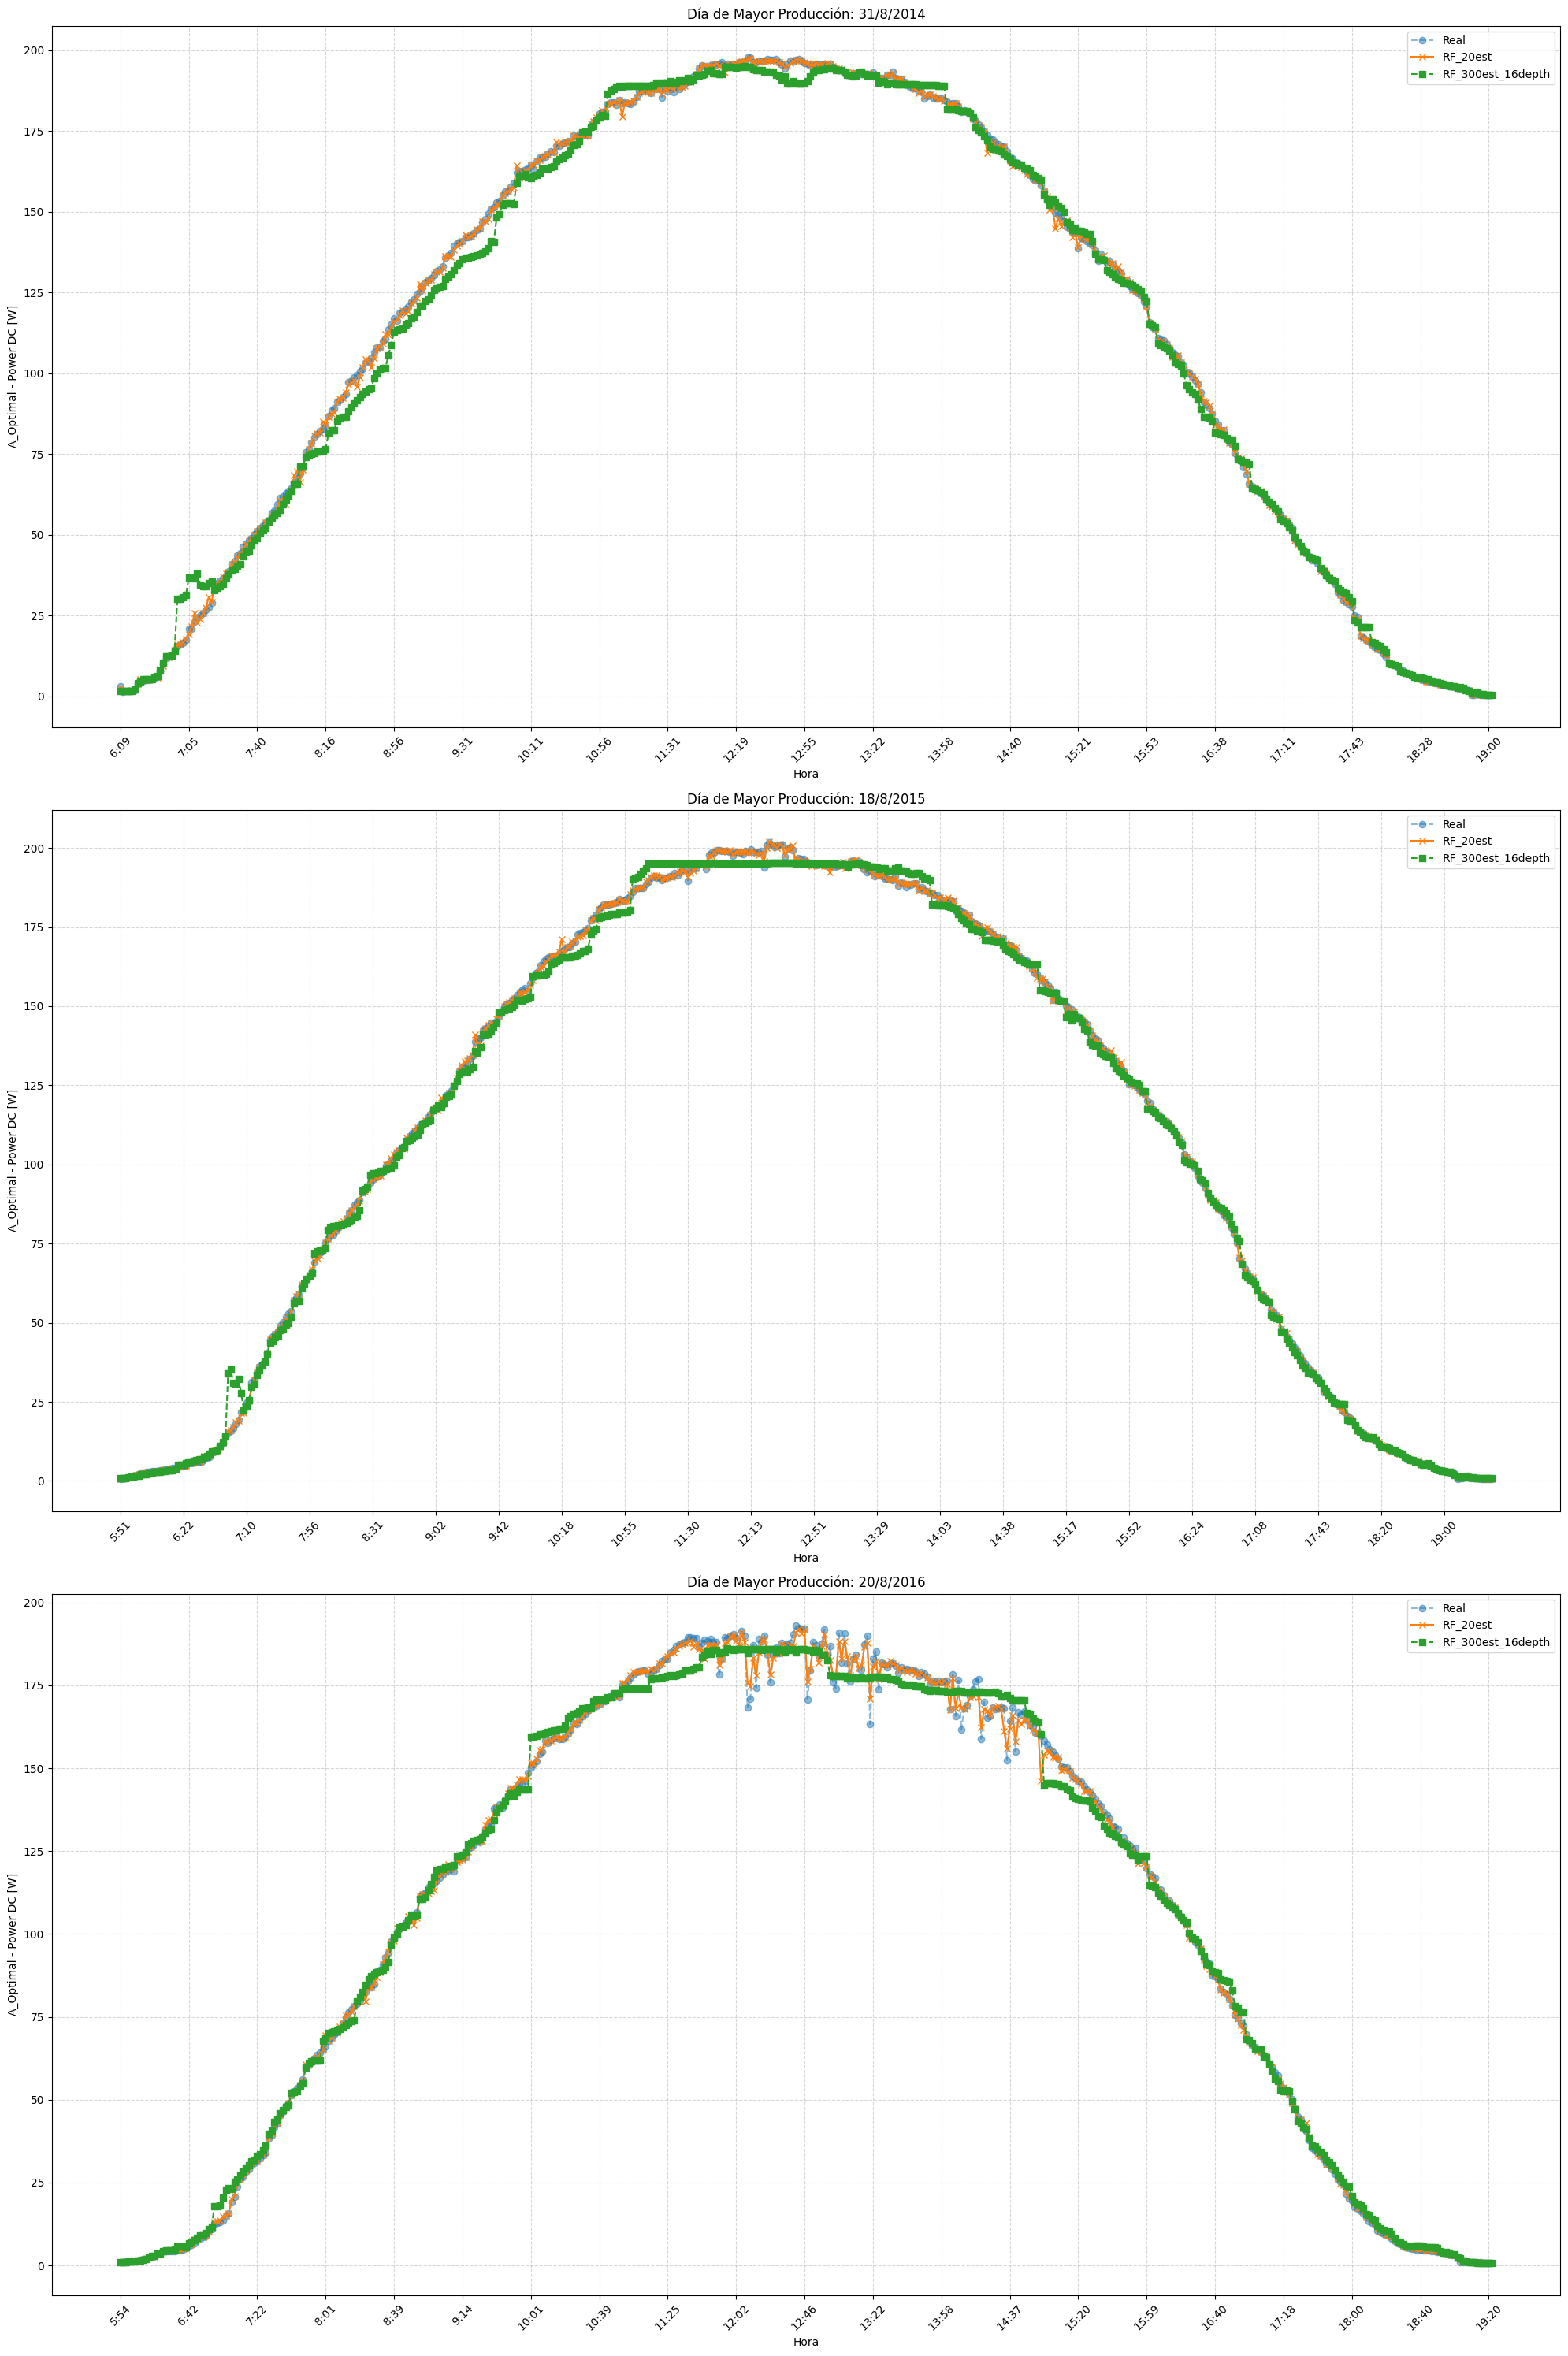

In [13]:
# Crear un DataFrame con los valores reales y predichos para RF_20est, RF_300est_16depth
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción RF_20est': y_train_pred_rf.flatten(),
    'Predicción RF_300est_16depth': y_train_pred_rf_16.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año
    ax = axes[i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción RF_20est'], label='RF_20est', marker="x", linestyle="-")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción RF_300est_16depth'], label='RF_300est_16depth', marker="s", linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year}')
    ax.set_xlabel('Hora')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()


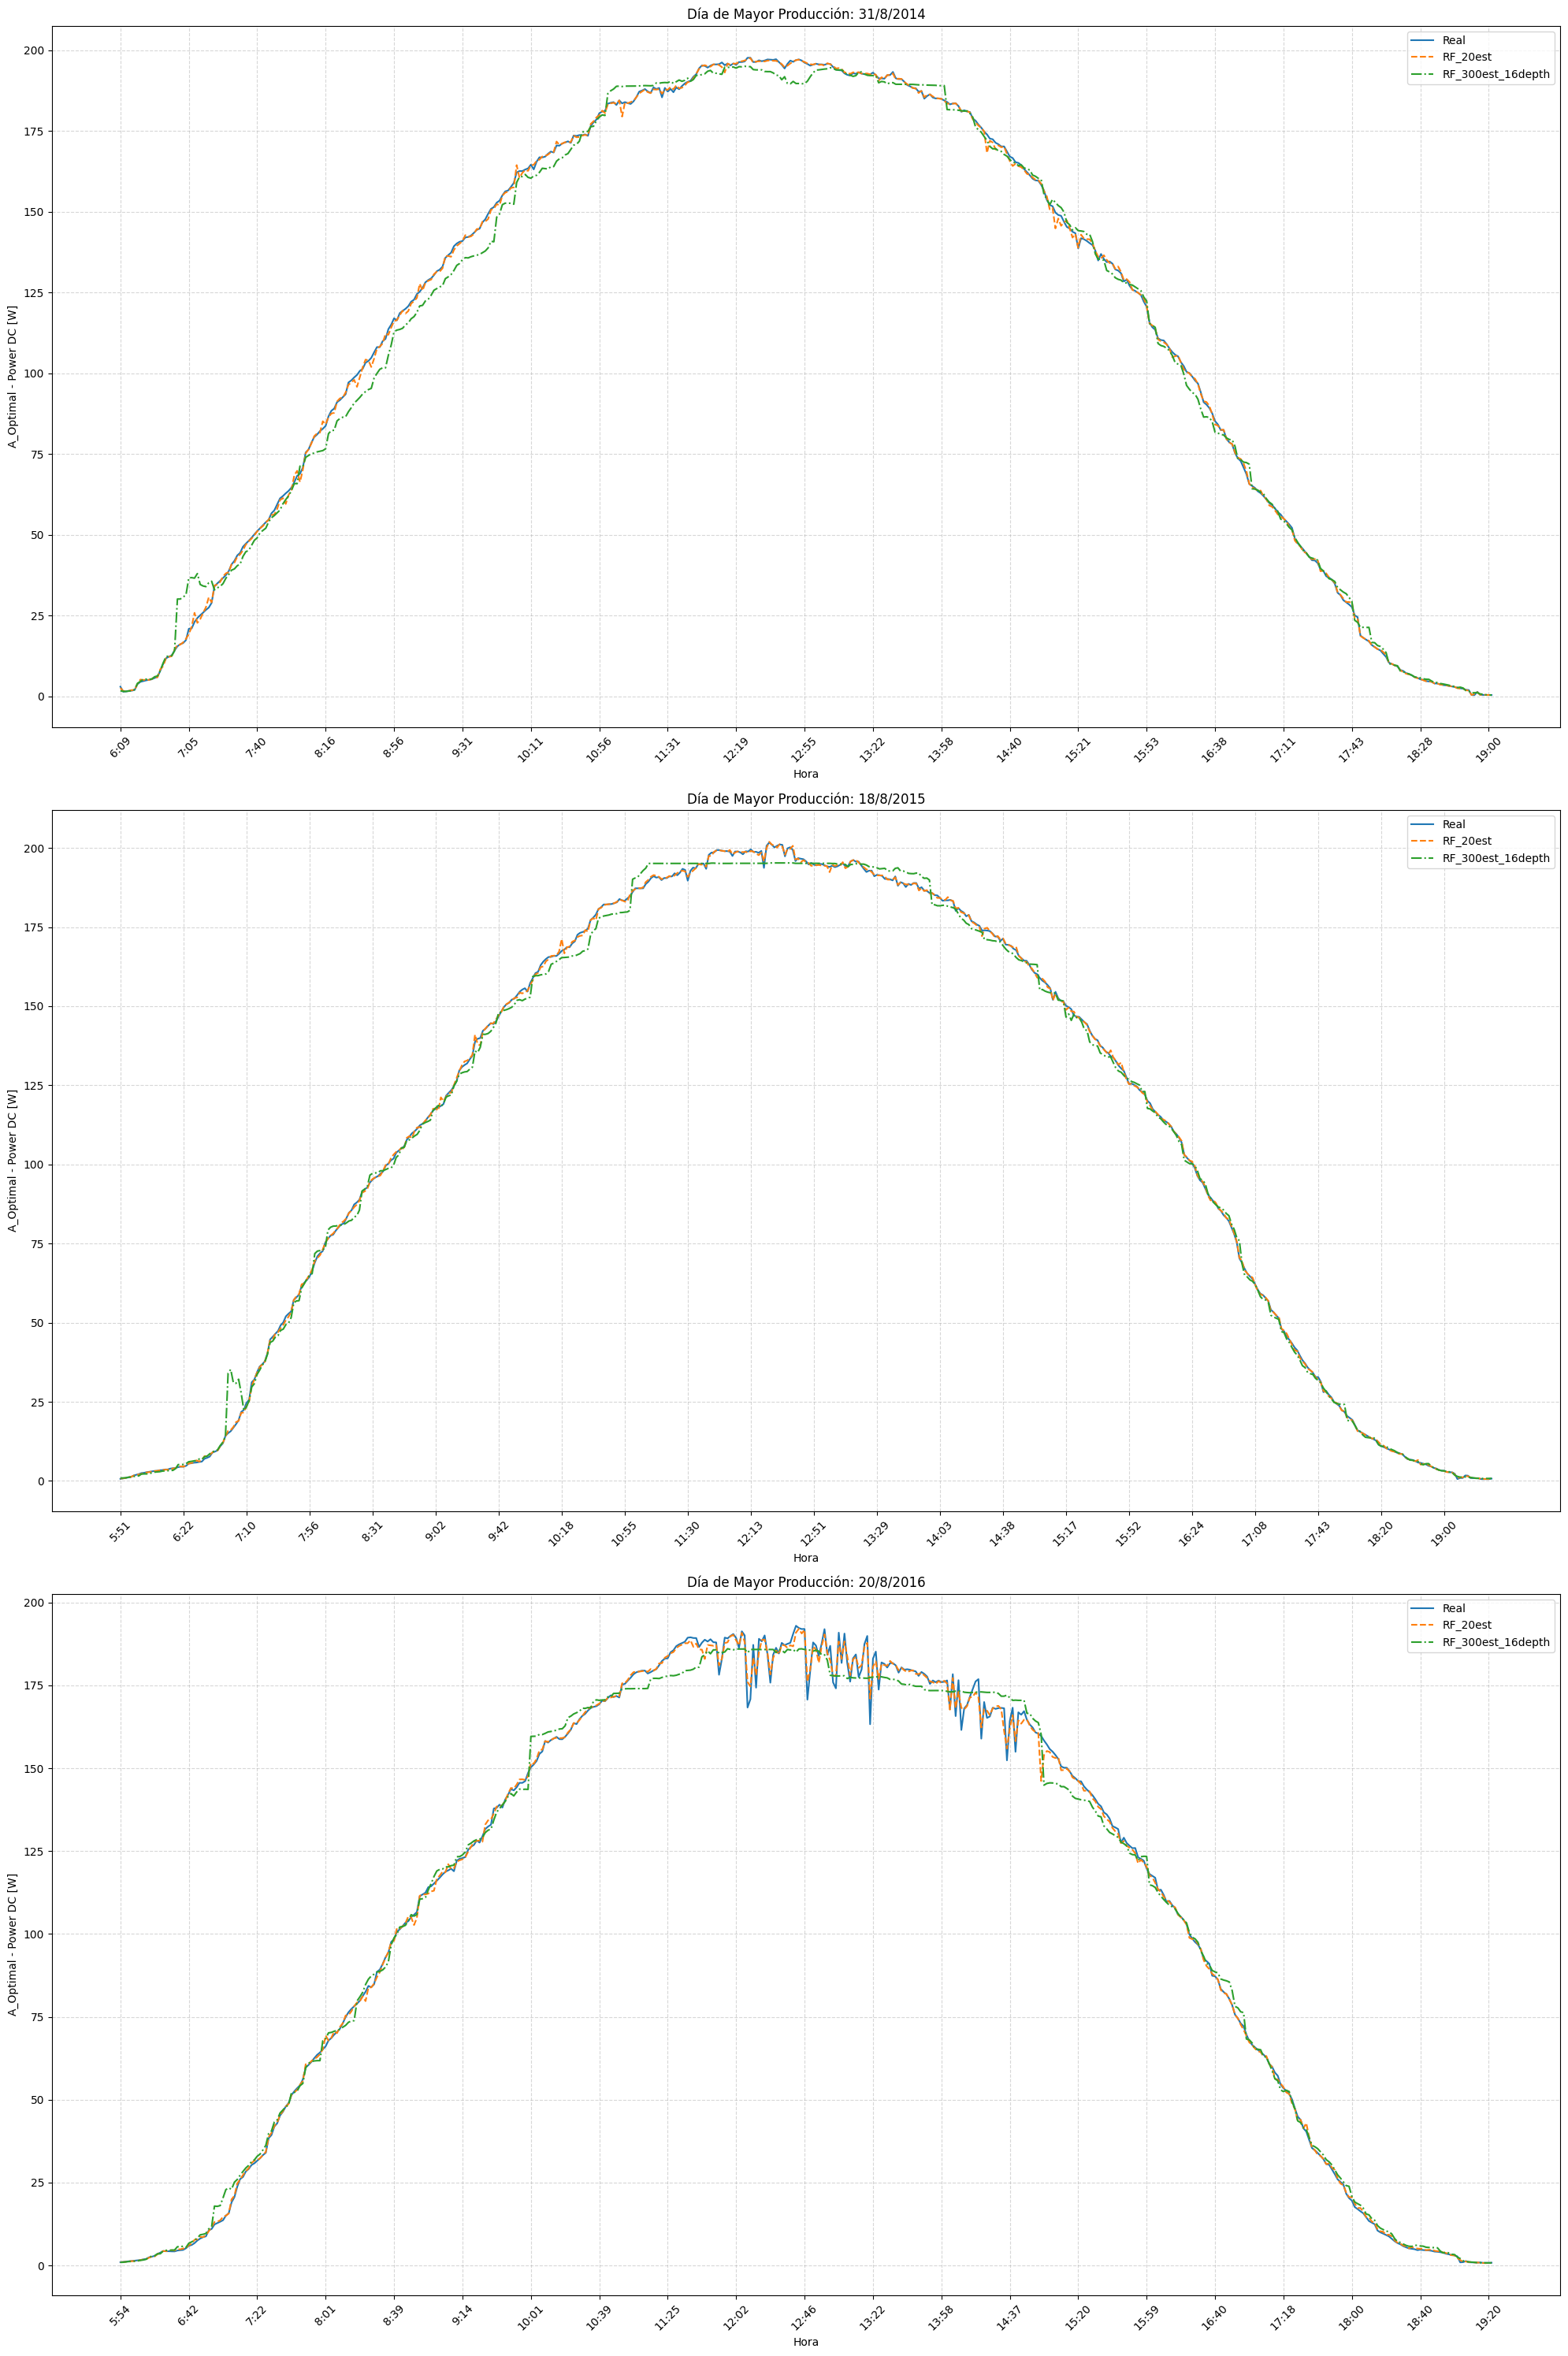

In [14]:
# Crear un DataFrame con los valores reales y predichos para RF_20est, RF_300est_16depth
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción RF_20est': y_train_pred_rf.flatten(),
    'Predicción RF_300est_16depth': y_train_pred_rf_16.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año
    ax = axes[i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real')
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción RF_20est'], label='RF_20est', linestyle="--")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción RF_300est_16depth'], label='RF_300est_16depth', linestyle="-.")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year}')
    ax.set_xlabel('Hora')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()


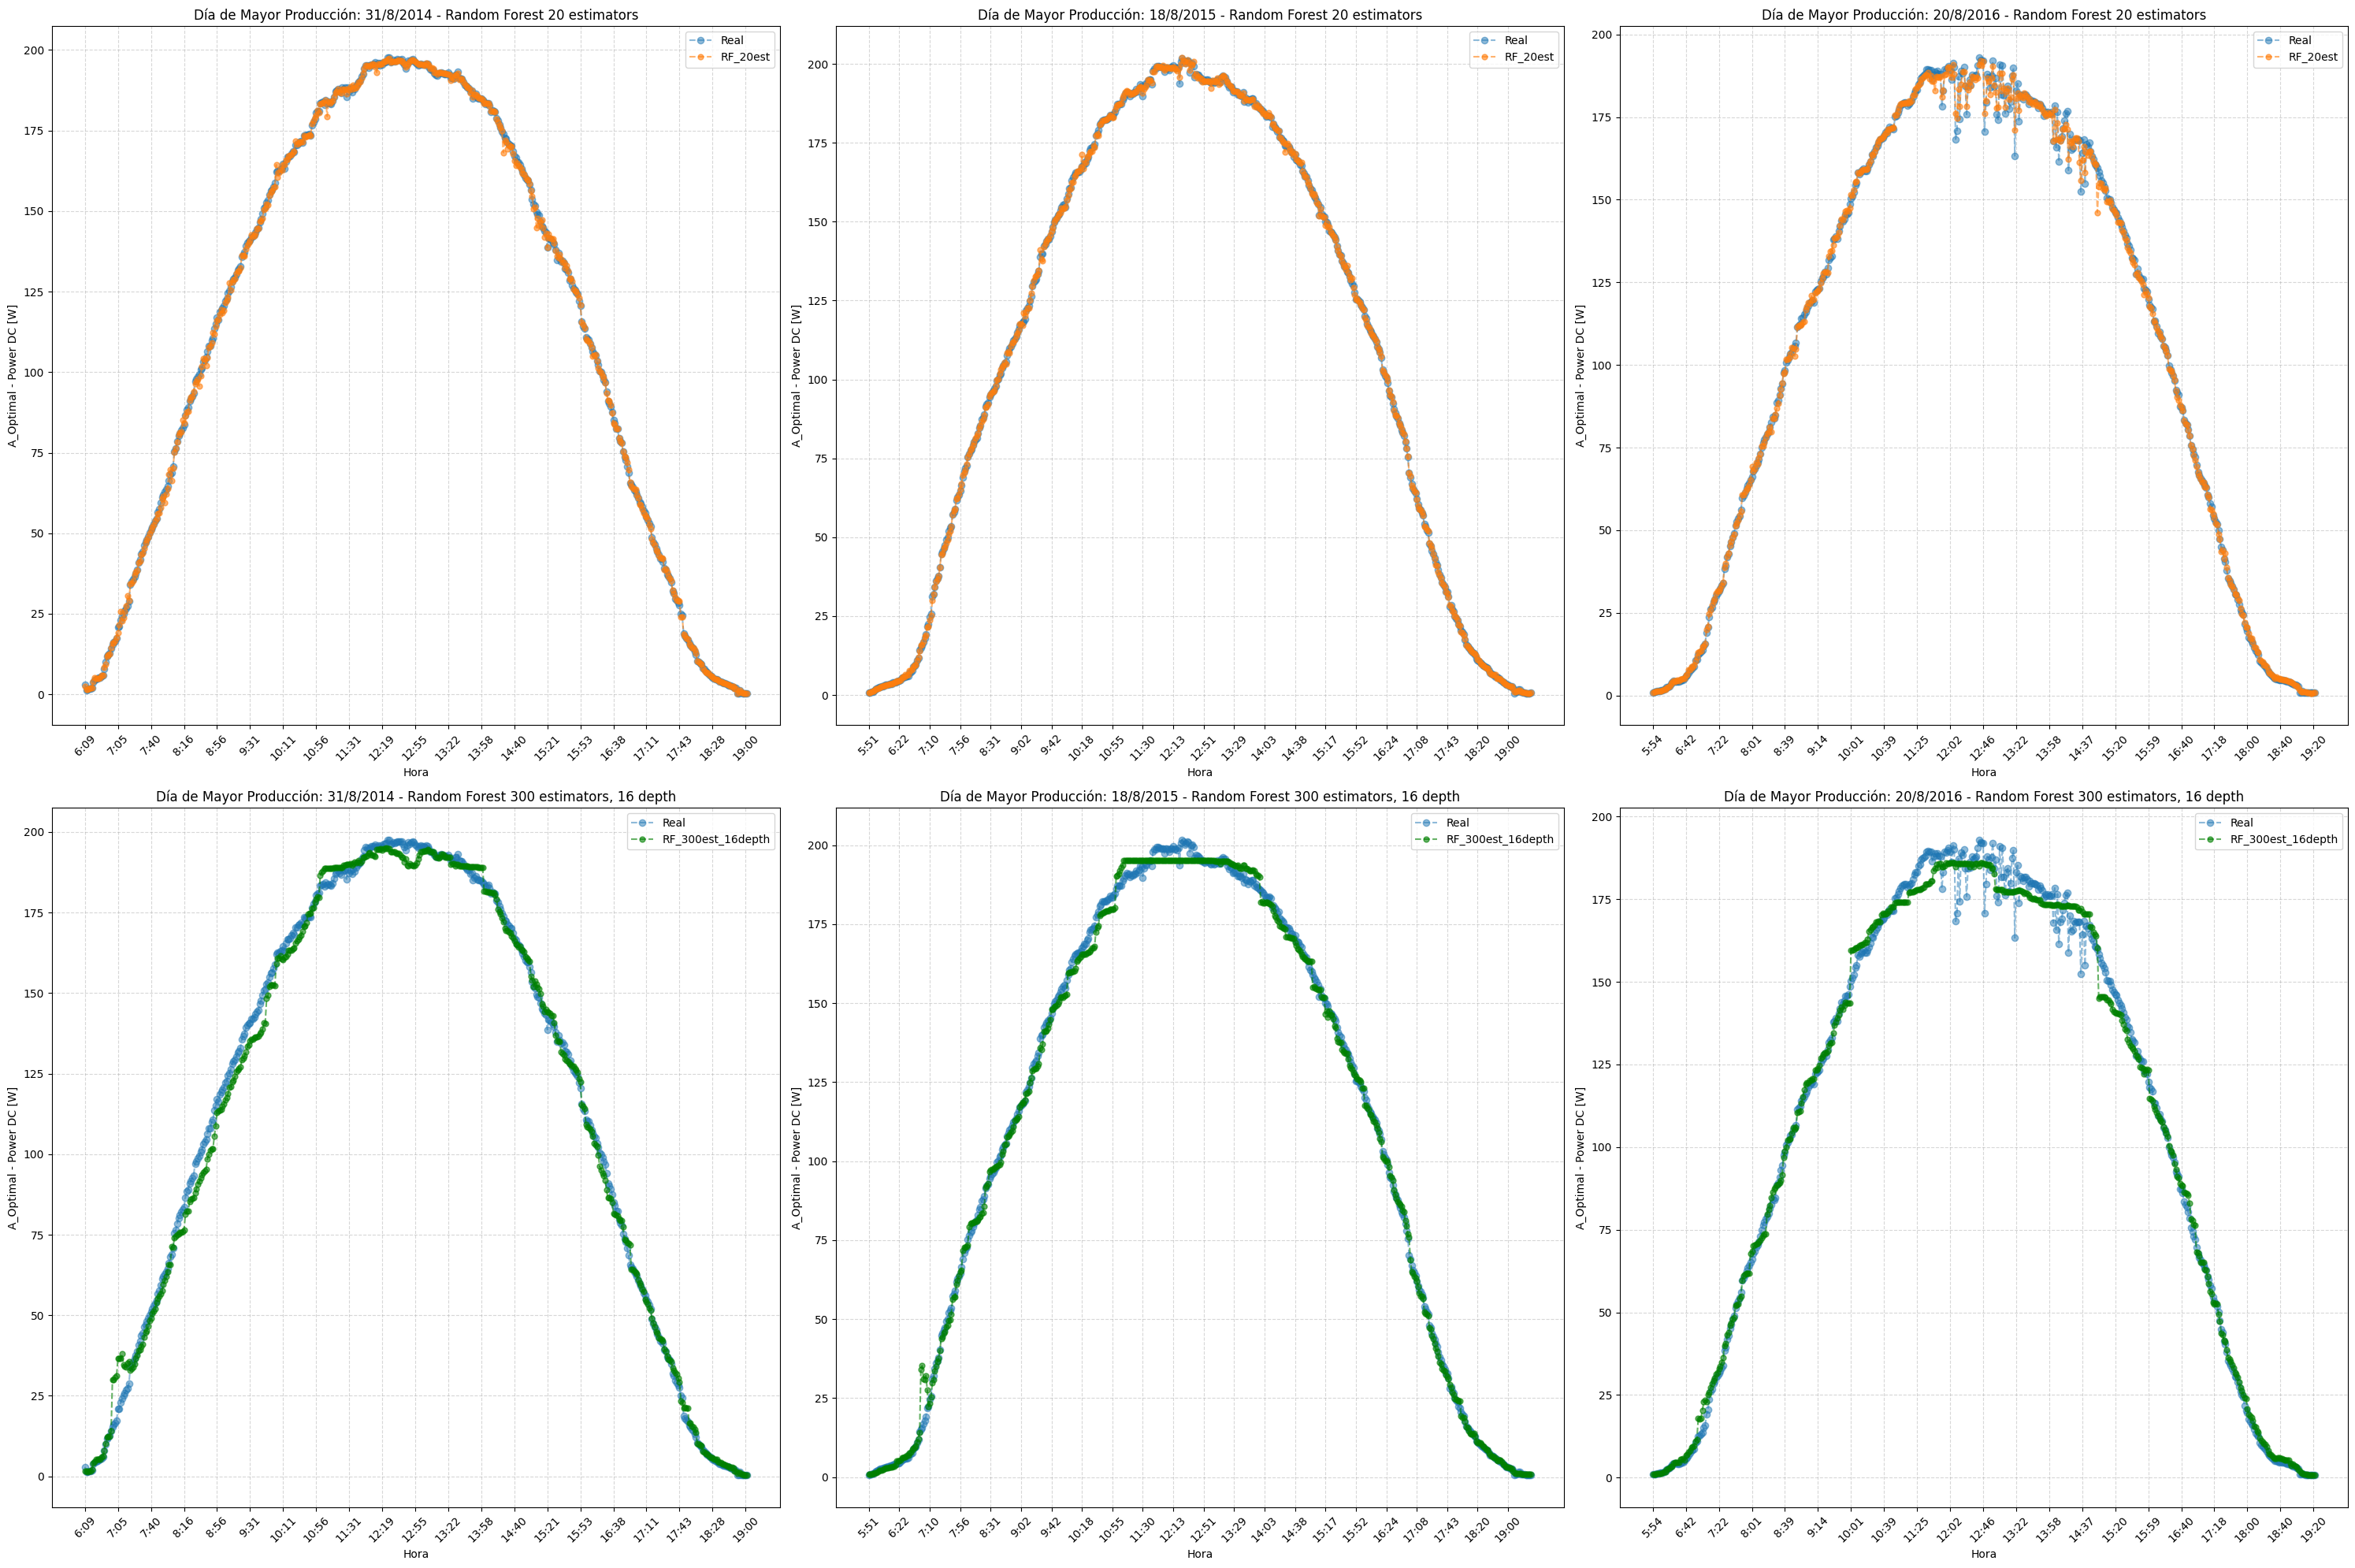

In [15]:
# Crear un DataFrame con los valores reales y predichos para RF_20est, RF_300est_16depth
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción RF_20est': y_train_pred_rf.flatten(),
    'Predicción RF_300est_16depth': y_train_pred_rf_16.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(2, 3, figsize=(30, 20))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año
    ax = axes[0, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción RF_20est'], label='RF_20est', marker="o", linestyle="dashed", alpha=0.6, markersize=5)
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Random Forest 20 estimators')
    ax.set_xlabel('Hora')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año 
    ax = axes[1, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción RF_300est_16depth'], label='RF_300est_16depth', marker="o", linestyle="dashed", color='green', alpha=0.6, markersize=5)
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Random Forest 300 estimators, 16 depth')
    ax.set_xlabel('Hora')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
plt.tight_layout()
plt.show()


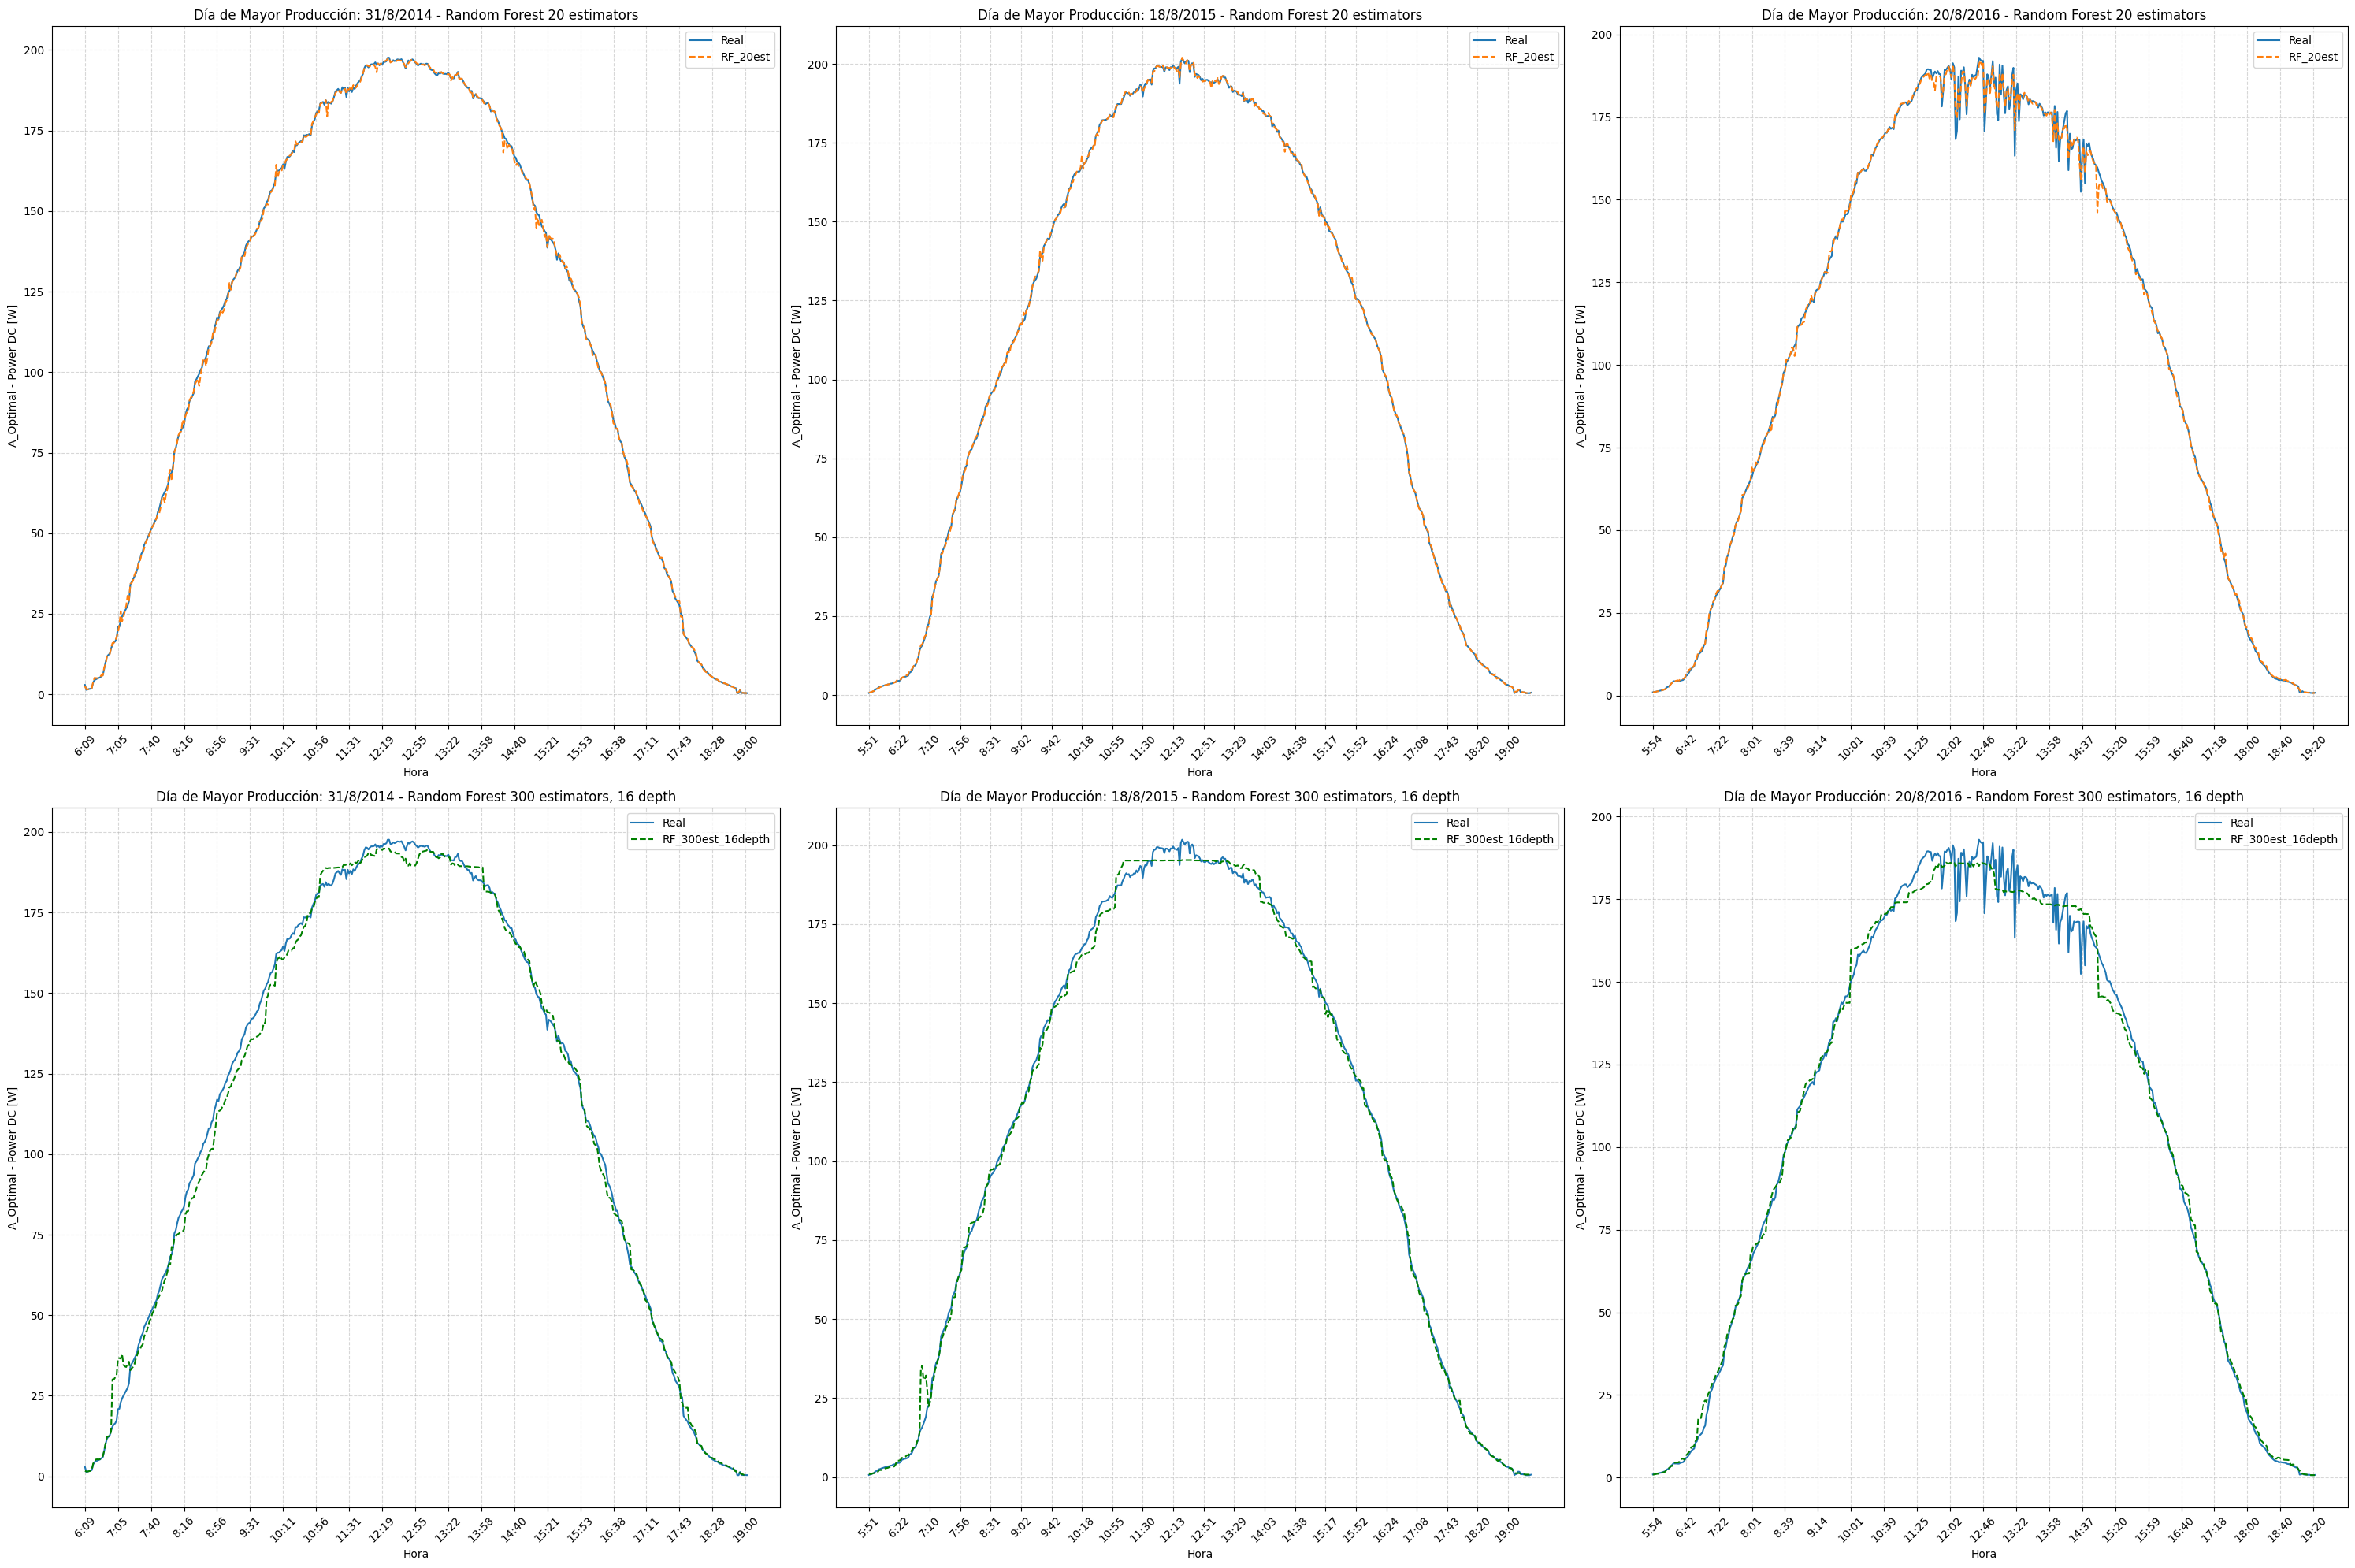

In [16]:
# Crear un DataFrame con los valores reales y predichos para RF_20est, RF_300est_16depth
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción RF_20est': y_train_pred_rf.flatten(),
    'Predicción RF_300est_16depth': y_train_pred_rf_16.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(2, 3, figsize=(30, 20))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año - DT10
    ax = axes[0, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real')
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción RF_20est'], label='RF_20est', linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Random Forest 20 estimators')
    ax.set_xlabel('Hora')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
    # Gráfica para el día de mayor producción de cada año - DT16
    ax = axes[1, i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real')
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción RF_300est_16depth'], label='RF_300est_16depth', linestyle="--", color='green')
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year} - Random Forest 300 estimators, 16 depth')
    ax.set_xlabel('Hora')
    ax.set_ylabel('A_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)
    
plt.tight_layout()
plt.show()


# Guardar el Modelo

In [ ]:
#Guardar el modelo de DT16
import joblib
joblib.dump(rf_reg_16, 'RF16_model.pkl')

# 5. Energía

In [19]:
import numpy as np
import pandas as pd

# Implementación manual del método de Simpson
def simpson_manual(y, x):
    n = len(x)
    if n < 2:
        raise ValueError("Se necesitan al menos dos puntos para calcular el área.")

    if len(y) != n:
        raise ValueError("El tamaño de los vectores x e y debe ser el mismo.")

    h = (x[-1] - x[0]) / (n - 1)  # Tamaño de los intervalos

    # Aplicar la regla de Simpson
    suma = y[0] + y[-1]  # y0 + yn
    for i in range(1, n - 1):
        if i % 2 == 0:
            suma += 2 * y[i]  # Coeficiente 2 para términos pares
        else:
            suma += 4 * y[i]  # Coeficiente 4 para términos impares
    area = h / 3 * suma
    return area

comparacion = pd.DataFrame({
    'Real': y_test_copy.values.flatten(),
    'Predicción RF_16': y_test_pred_rf.flatten(),
    'Mes': X_test_copy['Mes'].values.flatten(),
    'Año': X_test_copy['Año'].values.flatten(),
    'Día': X_test_copy['Día'].values.flatten(),
    'Hora': X_test_copy['Hora'].values.flatten(),
    'Minuto': X_test_copy['Minuto'].values.flatten()
})

# Filtrar los datos para los años 2014, 2015 y 2016
datos_filtrados = comparacion[comparacion['Año'].isin([2014, 2015, 2016])]

# Inicializar una lista para almacenar los resultados
resultados_totales = []

# Iterar sobre cada día de los años 2014, 2015 y 2016
for year in [2014, 2015, 2016]:
    for mes in range(1, 13):
        for dia in range(1, 32):
            dia_datos = datos_filtrados[(datos_filtrados['Año'] == year) & (datos_filtrados['Mes'] == mes) & (datos_filtrados['Día'] == dia)]
            if not dia_datos.empty:
                y_real = dia_datos['Real'].values
                x = np.arange(len(y_real))
                
                for modelo in ['Predicción RF_16']:
                    y_pred = dia_datos[modelo].values
                    area_real = simpson_manual(y_real, x)
                    area_pred = simpson_manual(y_pred, x)
                    error_relativo = abs(area_pred - area_real) / area_real * 100
                    mae = np.mean(np.abs(y_real - y_pred))

                    resultados_totales.append({
                        'Fecha': f'{dia}/{mes}/{year}',
                        'Modelo': modelo,
                        'Área Real': area_real,
                        'Área Predicha': area_pred,
                        'Error Relativo (%)': error_relativo,
                        'MAE': mae
                    })

# Crear un DataFrame con los resultados
df_resultados_totales = pd.DataFrame(resultados_totales)

# Mostrar el DataFrame con los resultados
print(df_resultados_totales)
print(df_resultados_totales.describe())

          Fecha            Modelo     Área Real  Área Predicha  \
0      1/1/2014  Predicción RF_16   7263.634815    7132.573583   
1      2/1/2014  Predicción RF_16   2024.465917    2934.182958   
2      3/1/2014  Predicción RF_16   4406.470917    5723.504384   
3      4/1/2014  Predicción RF_16   5902.292542    5708.005425   
4      5/1/2014  Predicción RF_16  10932.119250   10378.377433   
..          ...               ...           ...            ...   
853  25/12/2016  Predicción RF_16  14894.413000   14631.825618   
854  26/12/2016  Predicción RF_16  14719.776750   14500.131640   
855  27/12/2016  Predicción RF_16  14579.808833   14617.653408   
856  28/12/2016  Predicción RF_16  11465.496500   11418.930056   
857  29/12/2016  Predicción RF_16  10255.539750   10110.363123   

     Error Relativo (%)        MAE  
0              1.804348   4.812856  
1             44.936150   9.527326  
2             29.888623  15.061736  
3              3.291723  13.408896  
4              5.06527